Parámetros óptimos:
k = 0.09993988346120762
m = 0.9990545806063605


C:\Users\R9Magnum\AppData\Local\Temp\ipykernel_11228\2442310402.py:27: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))


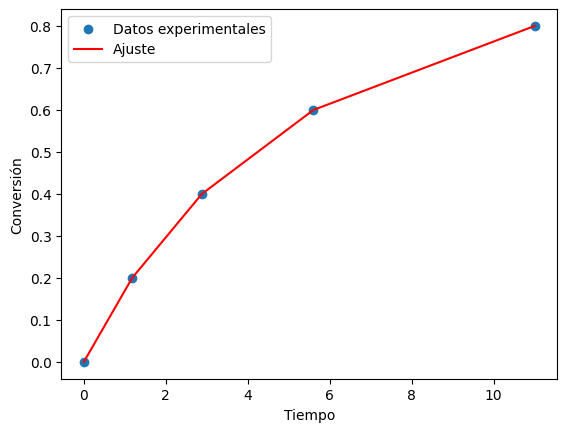

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Datos experimentales
tiempos = np.array([0,1.18, 2.88, 5.6, 11.0])
conversiones = np.array([0,0.2, 0.4, 0.6, 0.8])

# Valores conocidos
A0 = 1.0  # Valor conocido de A0
B0 = 2.0  # Valor conocido de B0
n = 1.0   # Valor conocido de n
a = 1.0   # Valor conocido de a
b = 1.0   # Valor conocido de b

# Definimos la función de la ecuación diferencial
def modelo_bimolecular(X, t, k, m):
    A = A0 * (1 - X)
    B = B0 - (b / a) * A0 * X
    dXdt = k * (A0 ** (n - 1)) * (A ** n) * (B ** m)
    return dXdt

# Función para resolver la ODE
def resolver_ode(params, t, X0):
    k, m = params
    X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))
    return X_sol.flatten()

# Función de ajuste para curve_fit
def funcion_ajuste(t, k, m):
    X0 = 0  # Conversión inicial
    X_ajustada = resolver_ode([k, m], t, X0)
    return X_ajustada

# Valores iniciales para los parámetros k y m
valor_inicial_k = 1.0  # Valor inicial para k
valor_inicial_m = 1.0  # Valor inicial para m
valores_iniciales = [valor_inicial_k, valor_inicial_m]

# Ajuste de los parámetros usando curve_fit
parametros_optimos, covarianza = curve_fit(funcion_ajuste, tiempos, conversiones, p0=valores_iniciales)

# Imprimir los parámetros óptimos
print("Parámetros óptimos:")
print("k =", parametros_optimos[0])
print("m =", parametros_optimos[1])

# Graficar los datos experimentales y el ajuste
plt.scatter(tiempos, conversiones, label='Datos experimentales')
plt.plot(tiempos, funcion_ajuste(tiempos, *parametros_optimos), label='Ajuste', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Conversión')
plt.legend()
plt.show()


Parámetros óptimos:
k = 0.0998928713725051


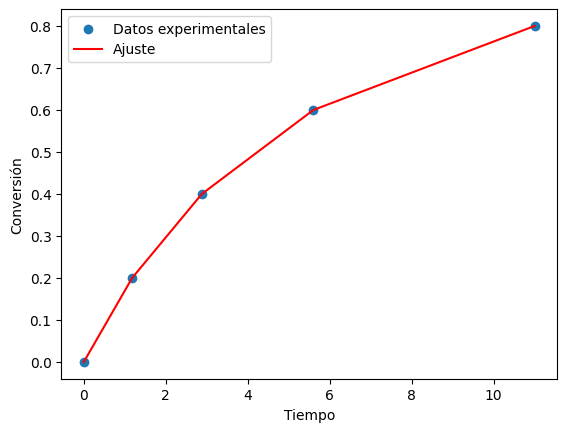

In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Datos experimentales
tiempos = np.array([0,1.18, 2.88, 5.6, 11.0])
conversiones = np.array([0,0.2, 0.4, 0.6, 0.8])

# Valores conocidos
A0 = 1.0  # Valor conocido de A0
B0 = 2.0  # Valor conocido de B0
m = 1.0   # Valor conocido de m
n = 1.0   # Valor conocido de n
a = 1.0   # Valor conocido de a
b = 1.0   # Valor conocido de b

# Definimos la función de la ecuación diferencial
def modelo_bimolecular(X, t, k):
    A = A0 * (1 - X)
    B = B0 - (b / a) * A0 * X
    dXdt = k * (A0 ** (n - 1)) * (A ** n) * (B ** m)
    return dXdt

# Función para resolver la ODE
def resolver_ode(k, t, X0):
    X_sol = odeint(modelo_bimolecular, X0, t, args=(k,))
    return X_sol.flatten()

# Función de ajuste para curve_fit
def funcion_ajuste(t, k):
    X0 = 0  # Conversión inicial
    X_ajustada = resolver_ode(k, t, X0)
    return X_ajustada

# Valores iniciales para el parámetro k
valor_inicial_k = 0.0998  # Valor inicial para k
valores_iniciales = [valor_inicial_k]

# Ajuste de los parámetros usando curve_fit
parametros_optimos, covarianza = curve_fit(funcion_ajuste, tiempos, conversiones, p0=valores_iniciales)

# Imprimir los parámetros óptimos
print("Parámetros óptimos:")
print("k =", parametros_optimos[0])

# Graficar los datos experimentales y el ajuste
plt.scatter(tiempos, conversiones, label='Datos experimentales')
plt.plot(tiempos, funcion_ajuste(tiempos, *parametros_optimos), label='Ajuste', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Conversión')
plt.legend()
plt.show()


k_optimo: 0.09993988346120762
m_optimo: 0.9990545806063605


C:\Users\R9Magnum\AppData\Local\Temp\ipykernel_11228\618951489.py:24: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))


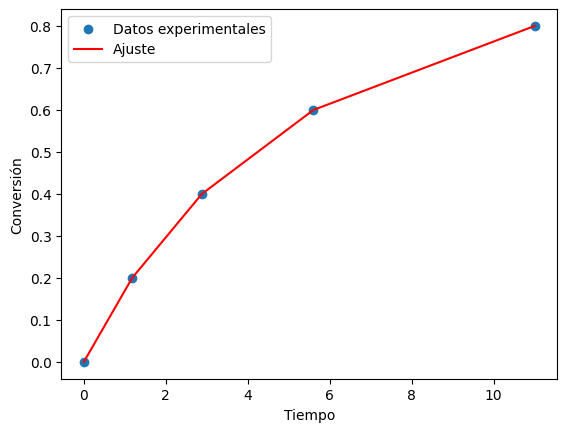

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

class MetodoIntegralAjustadorBimolecular:

    @staticmethod
    def ajustar_modelo_bimolecular(data_cinetica, columna_tiempo, columna_conversion, estimacion_inicial_k, estimacion_inicial_m, A0, B0, n, a, b):
        # Obtener los datos experimentales
        t_data = np.array(data_cinetica[columna_tiempo])
        conversiones_data = np.array(data_cinetica[columna_conversion])
        
        # Definimos la función de la ecuación diferencial
        def modelo_bimolecular(X, t, k, m):
            A = A0 * (1 - X)
            B = B0 - (b / a) * A0 * X
            dXdt = k * (A0 ** (n - 1)) * (A ** n) * (B ** m)
            return dXdt

        # Función para resolver la ODE
        def resolver_ode(params, t, X0):
            k, m = params
            X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))
            return X_sol.flatten()

        # Función de ajuste para curve_fit
        def funcion_ajuste(t, k, m):
            X0 = 0  # Conversión inicial
            X_ajustada = resolver_ode([k, m], t, X0)
            return X_ajustada

        # Valores iniciales para los parámetros k y m
        valores_iniciales = [estimacion_inicial_k, estimacion_inicial_m]

        # Ajuste de los parámetros usando curve_fit
        parametros_optimos, covarianza = curve_fit(funcion_ajuste, t_data, conversiones_data, p0=valores_iniciales)

        # Los valores óptimos de k y m
        k_optimo, m_optimo = parametros_optimos

        # Generar la cadena de texto con la ecuación del modelo ajustado
        ecuacion_texto = f'$-\\frac{{dA}}{{dt}} = {k_optimo:.4e} A^{{{n:.4f}}} B^{{{m_optimo:.4f}}}$'
        ecuacion_texto_cadena = f"-dA/dt = {k_optimo:.4e} * A^{{{n:.4f}}} * B^{{{m_optimo:.4f}}}"

        print('k_optimo:', k_optimo)
        print('m_optimo:', m_optimo)

        # Graficar los datos experimentales y el ajuste
        plt.scatter(t_data, conversiones_data, label='Datos experimentales')
        plt.plot(t_data, funcion_ajuste(t_data, *parametros_optimos), label='Ajuste', color='red')
        plt.xlabel('Tiempo')
        plt.ylabel('Conversión')
        plt.legend()
        plt.show()

        return k_optimo, m_optimo, 'modelo_bimolecular', ecuacion_texto, ecuacion_texto_cadena

# Ejemplo de uso:
import pandas as pd

# Datos experimentales como DataFrame
data_cinetica = pd.DataFrame({
    'tiempo': [0, 1.18, 2.88, 5.6, 11.0],
    'conversion': [0, 0.2, 0.4, 0.6, 0.8]
})

# Crear instancia del ajustador y ajustar el modelo
ajustador = MetodoIntegralAjustadorBimolecular()
k_optimo, m_optimo, nombre_modelo, ecuacion_texto, ecuacion_texto_cadena = ajustador.ajustar_modelo_bimolecular(
    data_cinetica,
    columna_tiempo='tiempo',
    columna_conversion='conversion',
    estimacion_inicial_k=1.0,
    estimacion_inicial_m=1.0,
    A0=1.0,
    B0=2.0,
    n=1.0,
    a=1.0,
    b=1.0
)


In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit

class MetodoIntegralAjustadorBimolecular:

    @staticmethod
    def ajustar_modelo_bimolecular(data_cinetica, columna_tiempo, columna_conversion, estimacion_inicial_k, estimacion_inicial_m, A0, B0, n, a, b):
        # Obtener los datos experimentales
        t_data = np.array(data_cinetica[columna_tiempo])
        conversiones_data = np.array(data_cinetica[columna_conversion])
        
        # Definimos la función de la ecuación diferencial
        def modelo_bimolecular(X, t, k, m):
            A = A0 * (1 - X)
            B = B0 - (b / a) * A0 * X
            dXdt = k * (A0 ** (n - 1)) * (A ** n) * (B ** m)
            return dXdt

        # Función para resolver la ODE
        def resolver_ode(params, t, X0):
            k, m = params
            X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))
            return X_sol.flatten()

        # Función de ajuste para curve_fit
        def funcion_ajuste(t, k, m):
            X0 = 0  # Conversión inicial
            X_ajustada = resolver_ode([k, m], t, X0)
            return X_ajustada

        # Valores iniciales para los parámetros k y m
        valores_iniciales = [estimacion_inicial_k, estimacion_inicial_m]

        # Ajuste de los parámetros usando curve_fit
        parametros_optimos, covarianza = curve_fit(funcion_ajuste, t_data, conversiones_data, p0=valores_iniciales)

        # Los valores óptimos de k y m
        k_optimo, m_optimo = parametros_optimos

        # Generar la cadena de texto con la ecuación del modelo ajustado
        ecuacion_texto = f'$-\\frac{{dA}}{{dt}} = {k_optimo:.4e} A^{{{n:.4f}}} B^{{{m_optimo:.4f}}}$'
        ecuacion_texto_cadena = f"-dA/dt = {k_optimo:.4e} * A^{{{n:.4f}}} * B^{{{m_optimo:.4f}}}"

        # Imprimir los parámetros óptimos
        print('k_optimo:', k_optimo)
        print('m_optimo:', m_optimo)

        return k_optimo, m_optimo, 'modelo_bimolecular', ecuacion_texto, ecuacion_texto_cadena

# Ejemplo de uso:
import pandas as pd

# Datos experimentales como DataFrame
data_cinetica = pd.DataFrame({
    'tiempo': [0, 1.18, 2.88, 5.6, 11.0],
    'conversion': [0, 0.2, 0.4, 0.6, 0.8]
})

# Crear instancia del ajustador y ajustar el modelo
ajustador = MetodoIntegralAjustadorBimolecular()
k_optimo, m_optimo, nombre_modelo, ecuacion_texto, ecuacion_texto_cadena = ajustador.ajustar_modelo_bimolecular(
    data_cinetica,
    columna_tiempo='tiempo',
    columna_conversion='conversion',
    estimacion_inicial_k=1.0,
    estimacion_inicial_m=1.0,
    A0=1.0,
    B0=2.0,
    n=1.0,
    a=1.0,
    b=1.0
)


k_optimo: 0.09993988346120762
m_optimo: 0.9990545806063605


C:\Users\R9Magnum\AppData\Local\Temp\ipykernel_11228\4211102540.py:23: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))


In [5]:
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

class MetodoIntegralAjustadorBimolecular:

    @staticmethod
    def ajustar_modelo_bimolecular(data_cinetica, columna_tiempo, columna_conversion, estimacion_inicial_k, estimacion_inicial_m, n, a, b,data_auxiliar):
        # Obtener los datos experimentales
        t_data = data_cinetica[columna_tiempo]
        conversiones_data = data_cinetica[columna_conversion]
        A_concentracion = data_cinetica['concentracion']
        # Filtrar el DataFrame
        filtro_A0 = (data_auxiliar['tipo_especie'] == 'reactivo_limitante') & (data_auxiliar['tiempo'] == 0) & (data_auxiliar['conversion_reactivo_limitante'] == 0)
        filtro_B0 = (data_auxiliar['tipo_especie'] == 'reactivo') & (data_auxiliar['tiempo'] == 0) & (data_auxiliar['conversion_reactivo_limitante'] == 0)

        # Asignar la columna 'concentracion' de las filas filtradas a B_concentracion
        B_concentracion = data_auxiliar.loc[filtro_B0, 'concentracion']
        B0 = data_auxiliar.loc[filtro_B0, 'concentracion'].iloc[0]
        A0 = data_auxiliar.loc[filtro_A0, 'concentracion'].iloc[0]
        
        # Definimos la función de la ecuación diferencial
        def modelo_bimolecular(X, t, k, m):
            A = A0 * (1 - X)
            B = B0 - (b / a) * A0 * X
            dXdt = k * (A0 ** (n - 1)) * (A ** n) * (B ** m)
            return dXdt

        # Función para resolver la ODE
        def resolver_ode(params, t, X0):
            k, m = params
            X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))
            return X_sol.flatten()

        # Función de ajuste para curve_fit
        def funcion_ajuste(t, k, m):
            X0 = 0  # Conversión inicial
            X_ajustada = resolver_ode([k, m], t, X0)
            return X_ajustada

        # Valores iniciales para los parámetros k y m
        valores_iniciales = [estimacion_inicial_k, estimacion_inicial_m]

        # Ajuste de los parámetros usando curve_fit
        parametros_optimos, covarianza = curve_fit(funcion_ajuste, t_data, conversiones_data, p0=valores_iniciales)

        # Los valores óptimos de k y m
        k_optimo, m_optimo = parametros_optimos

        # Generar la cadena de texto con la ecuación del modelo ajustado
        ecuacion_texto = f'$-\\frac{{dA}}{{dt}} = {k_optimo:.4e} A^{{{n:.4f}}} B^{{{m_optimo:.4f}}}$'
        ecuacion_texto_cadena = f"-dA/dt = {k_optimo:.4e} * A^{{{n:.4f}}} * B^{{{m_optimo:.4f}}}"

        # Imprimir los parámetros óptimos
        print('k_optimo:', k_optimo)
        print('m_optimo:', m_optimo)

        return k_optimo, m_optimo, 'modelo_bimolecular', ecuacion_texto, ecuacion_texto_cadena

# Ejemplo de uso:
# Datos experimentales como DataFrame
data_cinetica = pd.DataFrame({
    'tiempo': [0, 1.18, 2.88, 5.6, 11.0],
    'conversion_reactivo_limitante': [0, 0.2, 0.4, 0.6, 0.8],'concentracion': [1,1.6,1.2,0.8,0.4],
})
data_cinetica_auxiliar = pd.DataFrame({
    'tiempo': [0,0, 1.18, 2.88, 5.6, 11.0],
    'conversion_reactivo_limitante': [0,0, 0.2, 0.4, 0.6, 0.8],'concentracion': [2,1,1.6,1.2,0.8,0.4],
    'tipo_especie':['reactivo','reactivo_limitante','reactivo_limitante','reactivo_limitante','reactivo_limitante','reactivo_limitante'] 
})

# Crear instancia del ajustador y ajustar el modelo
ajustador = MetodoIntegralAjustadorBimolecular()
k_optimo, m_optimo, nombre_modelo, ecuacion_texto, ecuacion_texto_cadena = ajustador.ajustar_modelo_bimolecular(
    data_cinetica,
    columna_tiempo='tiempo',
    columna_conversion='conversion_reactivo_limitante',
    estimacion_inicial_k=1.0,
    estimacion_inicial_m=1.0,
    #A0=1.0,
    #B0=2.0,
    n=1.0,
    a=1.0,
    b=1.0,
    data_auxiliar=data_cinetica_auxiliar
)


k_optimo: 0.09993988346120762
m_optimo: 0.9990545806063605


C:\Users\R9Magnum\AppData\Local\Temp\ipykernel_11228\3500352611.py:32: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  X_sol = odeint(modelo_bimolecular, X0, t, args=(k, m))
